In [1]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importation du dataset
data = pd.read_csv('data/iris_dataset.csv')

In [3]:
data.sample(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
79,5.7,2.6,3.5,1.0,Versicolor
6,4.6,3.4,1.4,0.3,Setosa
47,4.6,3.2,1.4,0.2,Setosa
106,4.9,2.5,4.5,1.7,Virginica
120,6.9,3.2,5.7,2.3,Virginica
128,6.4,2.8,5.6,2.1,Virginica
39,5.1,3.4,1.5,0.2,Setosa
28,5.2,3.4,1.4,0.2,Setosa
124,6.7,3.3,5.7,2.1,Virginica
68,6.2,2.2,4.5,1.5,Versicolor


In [4]:
df = data.copy()
df.variety.value_counts()

Versicolor    50
Setosa        50
Virginica     50
Name: variety, dtype: int64

# - Objectif du projet
L'objectif de ce projet est de prédire la classe d'appartenance (Setosa,Versicolor, Virginica) d'un Iris en fonction de 4 caractérisques (sepal.length, 	sepal.width, petal.length et  petal.width).

## Metrique d'évaluation 
Les données dans les classes sont équilibrées (50 par classe). On peut donc utiliser : l'**accuracy** comme métriques d'évaluation.

# - Analyse exploratoire des données
## Objectif : 
Comprendre les données pour savoir notamment le modèle à utiliser.

## Checklist de base

**Analyse de forme** :

- Variable target : variety
- Lignes et colonnes : 150, 5
- Types de variables : qualitative : 1, quantitatives : 4
- Analyse des valeurs manquantes : pas de valeurs manquantes

**Analsye de fond** :
- Visualisation de la target : 33% de données par classe
- Relation variable / variable : les données sont bien distinguables. Le modèle arrivra donc à bien les distinguer
- Relation variable / target : on remarque que les "setosa" sont le plus détachés des autres espèces d'iris

In [5]:
df.shape

(150, 5)

In [6]:
df.dtypes.value_counts()

float64    4
object     1
dtype: int64

In [7]:
df.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [8]:
df.variety.value_counts(normalize=True)

Versicolor    0.333333
Setosa        0.333333
Virginica     0.333333
Name: variety, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.loc[:, 'sepal.length':'petal.width'], df.loc[:, 'variety'], random_state=0)

# iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

# tranformation de y-train en float
def convert_float(value):
    if value == 'Virginica':
        return 0
    if value == 'Versicolor':
        return 1
    if value =='Setosa':
        return 2

y_train = y_train.apply(convert_float)
y_test = y_test.apply(convert_float)

## Relation variable / variable

array([[<AxesSubplot:xlabel='sepal.length', ylabel='sepal.length'>,
        <AxesSubplot:xlabel='sepal.width', ylabel='sepal.length'>,
        <AxesSubplot:xlabel='petal.length', ylabel='sepal.length'>,
        <AxesSubplot:xlabel='petal.width', ylabel='sepal.length'>],
       [<AxesSubplot:xlabel='sepal.length', ylabel='sepal.width'>,
        <AxesSubplot:xlabel='sepal.width', ylabel='sepal.width'>,
        <AxesSubplot:xlabel='petal.length', ylabel='sepal.width'>,
        <AxesSubplot:xlabel='petal.width', ylabel='sepal.width'>],
       [<AxesSubplot:xlabel='sepal.length', ylabel='petal.length'>,
        <AxesSubplot:xlabel='sepal.width', ylabel='petal.length'>,
        <AxesSubplot:xlabel='petal.length', ylabel='petal.length'>,
        <AxesSubplot:xlabel='petal.width', ylabel='petal.length'>],
       [<AxesSubplot:xlabel='sepal.length', ylabel='petal.width'>,
        <AxesSubplot:xlabel='sepal.width', ylabel='petal.width'>,
        <AxesSubplot:xlabel='petal.length', ylabel='petal.

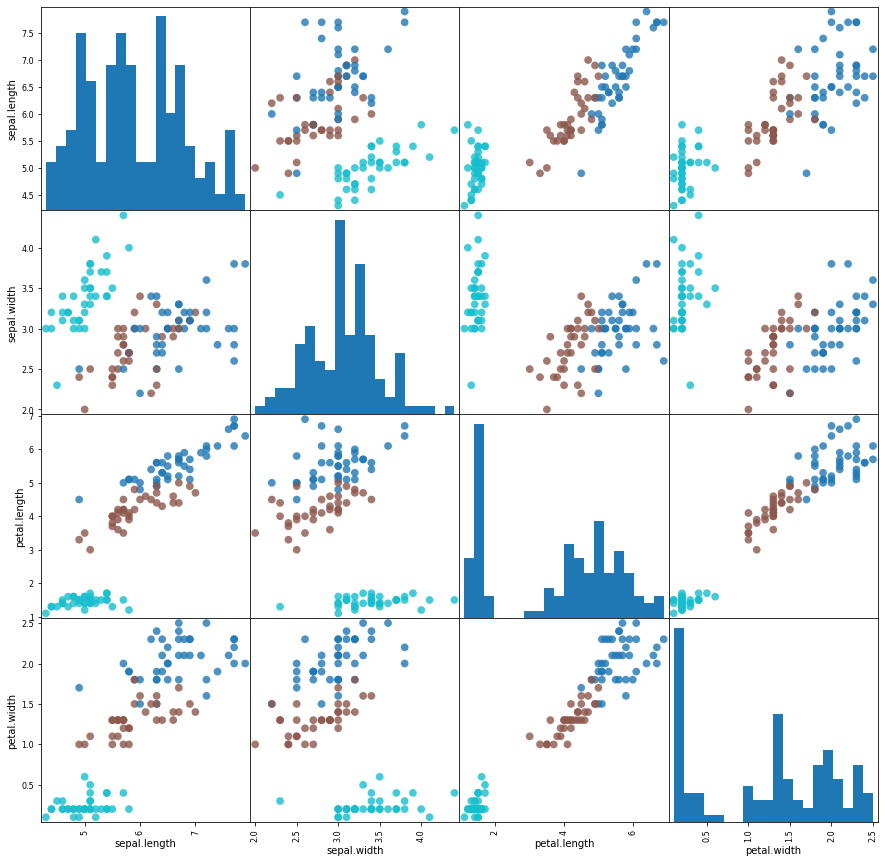

In [10]:
pd.plotting.scatter_matrix(X_train, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap='tab10')

## Relation variable / target

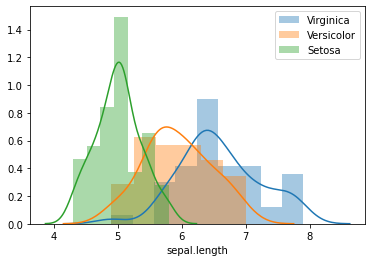

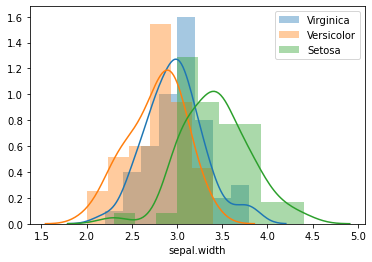

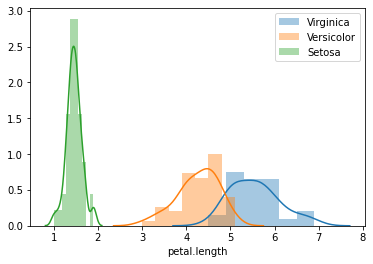

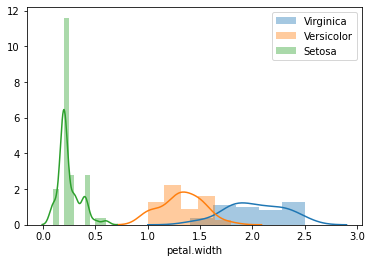

In [11]:
df_virginica = df[df['variety'] == 'Virginica']
df_versicolor = df[df['variety'] == 'Versicolor']
df_setosa = df[df['variety'] == 'Setosa']

for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df_virginica[col], label='Virginica')
    sns.distplot(df_versicolor[col], label='Versicolor')
    sns.distplot(df_setosa[col], label='Setosa')
    plt.legend()

# Construction du modèle

* Les données n'ayant pas de grands écarts (variances faibles dans les données), il n'est pas utile des les normaliser. 

In [12]:
# Taille du jeu d'entrainement
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [13]:
# Taille du jeu de test
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Choix du nombre de voisins
def model_train():
    score = []
    for n in range(1, 10):
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)
        score.append(knn.score(X_test, y_test))
    return score
score = model_train()

In [15]:
score

[0.9736842105263158,
 0.9473684210526315,
 0.9736842105263158,
 0.9473684210526315,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158]

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Prédiction

In [17]:
# X_new = np.array([[5.5, 4.4, 6.8, 4.1]])
X_new = np.array([[5, 2.9, 4, 1.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [18]:
prediction = knn.predict(X_new)
if prediction == 0: 
    print ('Virginica') 
if prediction == 1:
    print ('Versicolor') 
if prediction == 2:
    print ('Setosa')

Versicolor


# Evaluation 

In [19]:
y_pred = knn.predict(X_test)
print("Prédiction sur le jeu de test :\n", y_pred)

Prédiction sur le jeu de test :
 [0 1 2 0 2 0 2 1 1 1 0 1 1 1 1 2 1 1 2 2 0 1 2 2 0 2 2 1 1 2 0 1 2 0 0 1 2
 0]


In [20]:
print("Test set score: {:.2}".format(knn.score(X_test, y_test)))

Test set score: 0.97


In [21]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [22]:
def evaluation(model):    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [23]:
evaluation(knn)

[[ 9  0  0]
 [ 1 15  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00        13

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



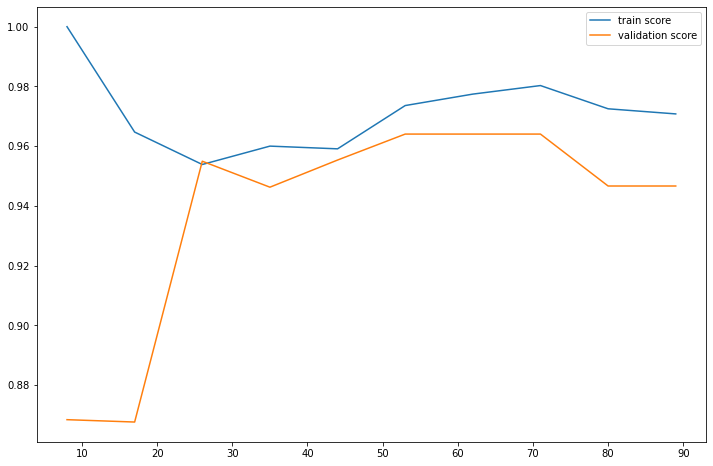

In [24]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(knn, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10))
    
    
plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
X = df.loc[:, 'sepal.length':'petal.width']
y = df.loc[:, 'variety']

scores = cross_val_score(knn, X, y, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]


In [28]:
print("Cross-validation scores: {:.2f}".format(scores.mean()))

Cross-validation scores: 0.97


In [29]:
X.corr(method='pearson')

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


In [30]:
from sklearn.model_selection import cross_validate
res = cross_validate(knn, X, y, cv=5, return_train_score=True)
display(res)

{'fit_time': array([0.00550032, 0.00300431, 0.00300169, 0.00500298, 0.00300074]),
 'score_time': array([0.00551772, 0.00499797, 0.00600076, 0.00599718, 0.00499892]),
 'test_score': array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.95833333, 0.95833333, 0.96666667, 0.96666667, 0.95      ])}

In [31]:
val = []
for n in y:
    val.append(n)
print(val)

['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicol

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logreg = LogisticRegression()

In [44]:
prediction = logreg.predict(X_new)
if prediction == 0: 
    print ('Virginica') 
if prediction == 1:
    print ('Versicolor') 
if prediction == 2:
    print ('Setosa')

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [35]:
from sklearn.model_selection import GridSearchCV

penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

In [36]:
param_grid = {'C':C, 'penalty':penalty}

In [37]:
grid_search = GridSearchCV(logreg, param_grid, cv=5)

In [38]:
grid_search.fit(X_train, y_train)

C:\Users\C.Golion\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\C.Golion\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\C.Golion\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\C.Golion\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\C.Golion\AppData\Local\Continuum

C:\Users\C.Golion\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\C.Golion\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\C.Golion\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fi

C:\Users\C.Golion\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\C.Golion\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l

C:\Users\C.Golion\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\C.Golion\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [39]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [40]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 59.94842503189409, 'penalty': 'l2'}
Best cross-validation score: 0.97


In [50]:
import joblib

In [49]:
# Enregistrement du modèle sous pickle string. 
saved_model = joblib.dump(knn, 'knn_model.pkl') 

# Chargement du modèle joblib
knn_from_joblib = joblib.load('knn_model.pkl')  
  
# Test du modèle pour faire des prédictions 
knn_from_joblib.predict(X_test) 

array([0, 1, 2, 0, 2, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 1,
       2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 2, 0], dtype=int64)